In [1]:
import numpy as np
import pandas as pd

In [4]:
# csv 파일 불러오기
# 인덱스 컬럼: 'student number'
df = pd.read_csv('data3/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


### 대표값
- 평균값(기댓값): 수치의 합계를 그 수치의 개수로 나눈 값. 에버리지(average)
- 중앙값: 통계 자료를 값의 크기의 차례로 늘어놓았을 때, 그 중앙에 있는 값. 메디안(median)
- 최빈값: 가장 많이 관측되는 수, 즉 주어진 값 중에서 가장 자주 나오는 값. 모드(mode)

평균값

In [9]:
df['english'].sum() / len(df['english'])

58.38

In [10]:
# 영어 점수의 평균
df['english'].sum() / len(df['english'])
df.mean()['english']

58.38

In [11]:
# 수학 점수의 평균
df['mathematics'].sum() / len(df['mathematics'])
df.mean()['mathematics']

78.88

중앙값

In [30]:
# 중앙값 계산하는 함수
def cal_median(x):
    # 데이터의 개수
    n = len(x)
    # 데이터가 짝수개일 경우
    if n % 2 == 0:
        # 데이터를 오름차순으로 정렬했을 때 가운데 두 데이터
        m0 = x.sort_values().values[n//2 - 1]
        m1 = x.sort_values().values[n//2]
        # 중앙값은 가운데 두 데이터의 평균
        median = (m0 + m1) / 2
    # 데이터가 홀수개일 경우
    else: 
        # 중앙값은 데이터를 오름차순으로 정렬했을 때 가운데 값
        median = x.sort_values.values()[n//2]
        
    return median

In [31]:
# 영어 점수의 중앙값
cal_median(df['english'])
np.median(df['english'])

57.5

In [34]:
# 수학 점수의 중앙값
cal_median(df['mathematics'])
np.median(df['mathematics'])

80.0

최빈값

In [35]:
from scipy.stats import mode

In [136]:
df['english'].value_counts().head()
# 57이 5명으로 가장 많다

57    5
65    4
66    3
55    3
54    3
Name: english, dtype: int64

In [37]:
# 영어 점수 최빈값
mode(df['english'])
# 57점이 5명으로 제일 많다

ModeResult(mode=array([57]), count=array([5]))

In [137]:
df['mathematics'].value_counts().head()
# 84, 82, 77점이 각각 4명으로 가장 많다

84    4
77    4
82    4
76    3
78    3
Name: mathematics, dtype: int64

In [38]:
# 수학 점수 최빈값
# mode함수는 동일한 개수의 데이터가 여러개일 경우 가장 작은 데이터를 반환한다.
mode(df['mathematics'])
# 최빈값중 77점이 가장 작으므로 77 반환

ModeResult(mode=array([77]), count=array([4]))

### 산포도: 데이터의 흩어져있는 정도를 가리키는 값
- 분산(variance)
    - 확률변수가 기댓값으로부터 얼마나 떨어진 곳에 분포하는지를 가늠하는 숫자
    - 관측값에서 평균을 뺀 값을 제곱하고, 그것을 모두 더한 후 전체 개수로 나눠서 구한다(편차 제곱의 평균)
- 표준편차(standard deviation)
    - 확률변수가 기댓값으로부터 얼마나 떨어진 곳에 분포하는지를 가늠하는 숫자
    - 분산의 제곱근 
    - 분산은 제곱을 했기 때문에 원데이터와 단위가 맞지 않지만 표준편차는 제곱근을 함으로써 원데이터와 단위가 같다

편차

In [52]:
# 영어 점수 평차
english_deviation = df['english'] - df['english'].mean()
english_deviation.head()

student number
1   -16.38
2    10.62
3    -2.38
4   -17.38
5    -1.38
Name: english, dtype: float64

In [53]:
# 수학 점수 편차 
math_deviation = df['mathematics'] - df['mathematics'].mean()
math_deviation.head()

student number
1   -13.88
2     1.12
3   -15.88
4   -15.88
5    -2.88
Name: mathematics, dtype: float64

분산

In [61]:
# 영어 점수 분산
(english_deviation**2).mean()
np.var(df['english'])

94.11560000000001

In [64]:
# 수학 점수 분산
(math_deviation**2).mean()
np.var(df['mathematics'])

69.38559999999995

In [ ]:
표준편차

In [66]:
np.sqrt((english_deviation**2).mean())

9.70131949788275

In [65]:
# 영어 점수 표준편차
np.sqrt((english_deviation**2).mean())
np.std(df['english'])

9.70131949788275

In [69]:
# 수학 점수 표준편차
np.sqrt((math_deviation**2).mean())
np.std(df['mathematics'])

8.329801918413184

In [70]:
# 통계 요약 정보
df.describe()

,english,mathematics
count,50.000000,50.000000
mean,58.380000,78.880000
std,9.799813,8.414371
min,37.000000,57.000000
25%,54.000000,76.000000
50%,57.500000,80.000000
75%,65.000000,84.000000
max,79.000000,94.000000


### 정규분포
- 정규분포(normal distribution)는 가우시안 분포(Gaussian distribution)라고도 불린다. 평균에 가까울수록 발생할 확률이 높고 평균에서 멀어질수록 발생할 확률이 적은 현상을 나타낼 수 있다
- 정규분포를 따르는 확률변수의 확률밀도함수(probability density function)의 그래프를 그리면 좌우대칭인 종 모양이 된다. 

### 표준화(standardization)
- 정규분포를 따르지만 평균과 표준편차가 각각 다른 현상들이 있을 때, 서로 비교하려면 표준화가 필요하다.
- 평균이 30점인 시험에서 60점을 받은 경우와 평균이 90점인 시험에서 60점을 받은 경우를 비교하기 위해서는 기준을 동일하게 설정해줘야 한다.
- 정규 분포의 표준화는 평균이 m이고 표준편차가 s인 정규 분포를 따르는 확률변수 X를 평균이 0이고 표준편차가 1인 표준정규분포를 따르는 확률변수 Z로 바꾸는 것을 의미한다.

In [84]:
# 영어 점수 표준화 
english_standardization = english_deviation / np.std(df['english'])
display(english_standardization.head())
print('평균: ', round(english_standardization.mean(), 2), '표준편차: :', round(english_standardization.std(), 2))

student number
1   -1.688430
2    1.094696
3   -0.245327
4   -1.791509
5   -0.142249
Name: english, dtype: float64

평균:  -0.0 표준편차: : 1.01


In [85]:
# 수학 점수 표준화 
math_standardization = math_deviation / np.std(df['mathematics'])
display(math_standardization.head())
print('평균: ', round(math_standardization.mean(), 2), '표준편차: :', round(math_standardization.std(), 2))

student number
1   -1.666306
2    0.134457
3   -1.906408
4   -1.906408
5   -0.345747
Name: mathematics, dtype: float64

평균:  0.0 표준편차: : 1.01


### 도수(frequency): 각 계급에 속하는 데이터의 개수

np.histogram

In [88]:
df['english'].values

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66])

In [90]:
np.histogram(df['english'].values, range=(0, 100), bins=10)
# 도수, 계급 반환

# 범위
# 0 <= x < 10
# 10 <= x < 20
# 20 <= x < 30
# ...
# 90 <= x <= 100

(array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

pd.cut()

In [93]:
pd.cut(df['english'], bins=range(0, 101, 10)).value_counts().sort_index()
# 계급, 도수 시리즈 반환

# 범위 
0 < x <= 10
10 < x <= 20
...
90 < x < 101

(0, 10]       0
(10, 20]      0
(20, 30]      0
(30, 40]      2
(40, 50]      8
(50, 60]     16
(60, 70]     20
(70, 80]      4
(80, 90]      0
(90, 100]     0
Name: english, dtype: int64

그래프 그리기

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

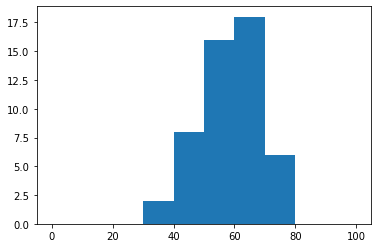

In [115]:
plt.hist(df['english'], bins=10, range=(0, 100)) # np.histogram과 범위 같다
plt.show()

/Users/dongja/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


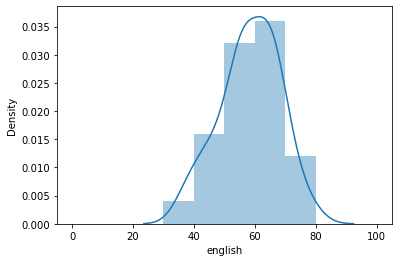

In [101]:
sns.distplot(df['english'], bins=10, hist_kws={'range': [0, 100]})
plt.show()

### 수학 점수 도수분포표

In [122]:
# 도수, 계급
freq, r = np.histogram(df['mathematics'], bins=10, range=(0, 100))
print(freq)
print(r)

[ 0  0  0  0  0  1  6 16 23  4]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [132]:
# 계급값: 각 계급의 중앙값
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [123]:
# 상대 도수
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.12, 0.32, 0.46, 0.08])

In [124]:
# 누적 상대 도수
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.14, 0.46, 0.92, 1.  ])

In [131]:
# 계급, 도수로 데이터 프레임 생성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
math_df = pd.DataFrame({'frequency': freq}, index=pd.Index(freq_class, name='class'))
math_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,0
40~50,0
50~60,1
60~70,6
70~80,16
80~90,23


In [135]:
# 계급값, 상대도수, 누적상대도수 데이터 프레임에 추가
math_df['class value'] = class_value
math_df['relative frequency'] = rel_freq
math_df['cumulative relative frequency'] = cum_rel_freq
# 컬럼 순서 바꾸기
math_df = math_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]
math_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,0,0.00,0.00
40~50,45,0,0.00,0.00
50~60,55,1,0.02,0.02
60~70,65,6,0.12,0.14
70~80,75,16,0.32,0.46
80~90,85,23,0.46,0.92
